# Setup

In [1]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib import style
# import numpy as np
# import pickle
# import os
# from sklearn.decomposition import NMF, PCA
# from sklearn.cluster import KMeans
# from importlib import reload
# import seaborn as sns

# import sys
# sys.path.insert(1, '../../t-recs/')
# from trecs.metrics import MSEMeasurement, InteractionSpread, InteractionSpread, InteractionSimilarity, RecSimilarity, RMSEMeasurement, InteractionMeasurement
# from trecs.components import Users
# import trecs.matrix_ops as mo

# sys.path.insert(1, '../')
# import src.globals as globals
# from wrapper.models.bubble import BubbleBurster
# from src.utils import get_clusters, create_embeddings, load_or_create_measurements_df, load_and_process_movielens, collect_parameters, load_measurements
# from src.scoring_functions import top_k_reranking
# from wrapper.metrics.evaluation_metrics import SerendipityMetric, DiversityMetric, NoveltyMetric, RecallMeasurement, UserMSEMeasurement
# import src.globals as globals

# random_state = np.random.seed(42)
# plt.style.use("seaborn")

# # import warnings filter
# from warnings import simplefilter
# # ignore all future warnings
# simplefilter(action='ignore', category=FutureWarning)

# globals.initialize()

# ratings_df = pd.read_csv('../data/ml-100k/u.data', 
#     sep="\t", 
#     names=['UserID', 'MovieID', 'Rating', 'Timestamp']
# )

# movie_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# movies_df = pd.read_csv('../data/ml-100k/u.item', sep="|", names=movie_cols, encoding='latin')

# # display(movies_df.head(2))
# # print(movies_df.shape)

In [2]:
# from sklearn.cluster import KMeans

# def get_topic_clusters(binary_ratings_matrix, n_attrs:int=100, nmf_solver:str="mu"):
#     """
#     Creates clusters of movies based on their genre.
#     Inputs:
#         binary_ratings_matrix: a binary matrix of users and movies
#         n_attrs: number of attributes to use in NMF
#         nmf_solver: solver to use in NMF
#     Outputs:
#         clusters: a list of cluster assignments
#     """
#     # Create topic clusters
#     #create co-occurence matrix from binary_interaction_matrix
#     co_occurence_matrix = binary_ratings_matrix.T @ binary_ratings_matrix
#     co_occurence_matrix

#     # Matrix factorize co_occurence_matrix to get embeddings
#     nmf_cooc = NMF(n_components=n_attrs, solver=nmf_solver)
#     W_topics = nmf_cooc.fit_transform(co_occurence_matrix)

#     # cluster W_topics
#     kmeans = KMeans(n_clusters=100, random_state=random_state).fit(W_topics)

#     # assign nearest cluster to observation
#     cluster_ids = kmeans.predict(W_topics)

#     return cluster_ids

In [3]:
# from sklearn.decomposition import NMF

# binary_ratings_df = ratings_df.drop(columns=['Timestamp'])
# binary_ratings_df.loc[binary_ratings_df['Rating'] > 0, 'Rating'] = 1

# # turn dataframe into matrix where each movie is a column and each user is a row
# binary_ratings_matrix = binary_ratings_df.pivot(index='UserID', columns='MovieID', values='Rating').fillna(0).to_numpy()

# from lightfm.cross_validation import random_train_test_split
# from scipy import sparse

# # split data into train and test sets
# train_interactions, test_interactions = random_train_test_split(sparse.csr_matrix(binary_ratings_matrix), test_percentage=0.2, random_state=random_state)
# train_interactions = train_interactions.toarray()
# test_interactions = test_interactions.toarray()

# n_attrs=100
# nmf = NMF(n_components=n_attrs, solver="mu")
# user_representation = nmf.fit_transform(binary_ratings_matrix)
# item_representation = nmf.components_
# print(user_representation.shape, item_representation.shape)

# num_topics = None
# item_topics = get_topic_clusters(binary_ratings_matrix, n_attrs=n_attrs, nmf_solver="mu")
# user_topic_history = None
# item_count = None

# users = Users(size=(943,100), repeat_interactions=False)

<!-- # Trial & error for `top_k_reranking` score_fn function implementation -->

In [4]:
# sys.path.insert(1, '../')

# from wrapper.models.bubble import BubbleBurster

In [5]:
# bubble = BubbleBurster(
#     # num_users=number_of_users,
#     # num_items=num_items,
#     # num_attributes=number_of_attributes,
#     item_topics=item_topics,
#     user_representation=user_representation,
#     item_representation=item_representation,
#     actual_user_representation=users,
#     record_base_state=True,
#     # score_fn=next_k_myopic_scoring
# )

In [6]:
# from wrapper.metrics import UserMSEMeasurement

# bubble.add_metrics(MSEMeasurement())
# print("These are the current metrics:")
# print(bubble.metrics)

In [7]:
# import trecs.matrix_ops as mo
# from numpy.random import RandomState

# rs = RandomState(42)

In [8]:
# k = bubble.num_items_per_iter

# pred_scores = mo.inner_product(bubble.predicted_user_profiles, bubble.predicted_item_attributes)

# top_k_idxs = mo.top_k_indices(matrix=pred_scores, k=k, random_state=rs)
# top_k_idxs

In [9]:
# for i in range(bubble.num_users):
#     bool = np.array_equal(np.sort(pred_scores[i, top_k_idxs[i,:]])[-1::-1], pred_scores[i, top_k_idxs[i,:]])
#     assert(bool)

In [10]:
# top_k_re_ranked_idxs = top_k_idxs[:,-1::-1]
# top_k_re_ranked_scores = np.take_along_axis(pred_scores, top_k_idxs, axis=1)

# # print(np.sort(top_k_re_ranked_scores)[0])
# print(pred_scores[0, top_k_idxs[0]])

# top_k_re_ranked_scores = top_k_re_ranked_scores[:, -1::-1]

# assert(np.array_equal(top_k_re_ranked_scores[i,:], pred_scores[i, top_k_idxs[i,:]][-1::-1]))

# re_ranked_scores = np.copy(pred_scores)
# np.put_along_axis(re_ranked_scores, top_k_idxs, top_k_re_ranked_scores, axis=1)
# print(re_ranked_scores[0, top_k_idxs[0]])#.shape

# for i in range(bubble.num_users):
#     # Checking that re_ranked_scores is equal to top_k_re_ranked_scores for each user
#     assert(np.array_equal(re_ranked_scores[i, top_k_idxs[i,:]], top_k_re_ranked_scores[i,:]))
#     # Checking that re_ranked_scores[top_k_idxs] is equal to the reverse of pred_scores[top_k_idxs]
#     assert(np.array_equal(re_ranked_scores[i, top_k_idxs[i,:]], pred_scores[i,top_k_idxs[i,:]][-1::-1]))

In [11]:
# k = bubble.num_items_per_iter

# pred_scores = mo.inner_product(bubble.predicted_user_profiles, bubble.predicted_item_attributes)
# top_k_idxs = mo.top_k_indices(matrix=pred_scores, k=k, random_state=rs)

# top_k_re_ranked_idxs = top_k_idxs[:,-1::-1]
# top_k_re_ranked_scores = np.take_along_axis(pred_scores, top_k_idxs, axis=1)
# top_k_re_ranked_scores = top_k_re_ranked_scores[:, -1::-1]

# re_ranked_scores = np.copy(pred_scores)
# np.put_along_axis(re_ranked_scores, top_k_idxs, top_k_re_ranked_scores, axis=1)

In [12]:
# for i in range(bubble.num_users):
#     # Checking that re_ranked_scores is equal to top_k_re_ranked_scores for each user
#     assert(np.array_equal(re_ranked_scores[i, top_k_idxs[i,:]], top_k_re_ranked_scores[i,:]))
#     # Checking that re_ranked_scores[top_k_idxs] is equal to the reverse of pred_scores[top_k_idxs]
#     assert(np.array_equal(re_ranked_scores[i, top_k_idxs[i,:]], pred_scores[i,top_k_idxs[i,:]][-1::-1]))

In [13]:
# print(re_ranked_scores[:, top_k_idxs][0, 0])#.shape)
# print(re_ranked_scores[:, top_k_idxs][0])#.shape)

In [14]:
# pred_scores[:, top_k_idxs][0][:,-1::-1]

<!-- # Testing implementation of `top_k_reranking` score_fn function -->

In [15]:
# from src.scoring_functions import top_k_reranking

# bubble = BubbleBurster(
#     # num_users=number_of_users,
#     # num_items=num_items,
#     # num_attributes=number_of_attributes,
#     item_topics=item_topics,
#     user_representation=user_representation,
#     item_representation=item_representation,
#     actual_user_representation=users,
#     record_base_state=True,
#     score_fn=top_k_reranking
# )

In [16]:
# from wrapper.metrics import UserMSEMeasurement

# bubble.add_metrics(MSEMeasurement())
# print("These are the current metrics:")
# print(bubble.metrics)

In [17]:
# # np.array_equal(bubble.predicted_user_item_scores, bubble.predicted_scores.value)
# bubble.predicted_user_item_scores

In [18]:
# import trecs.matrix_ops as mo
# from numpy.random import RandomState

# rs = RandomState(42)

# k = bubble.num_items_per_iter

# pred_scores = mo.inner_product(bubble.predicted_user_profiles, bubble.predicted_item_attributes)

# top_k_idxs = mo.top_k_indices(matrix=pred_scores, k=k, random_state=rs)

# for i in range(bubble.num_users):
#     not_equal_idxs = np.where(np.equal(bubble.predicted_user_item_scores[i], pred_scores[i]) == False)
#     assert(np.array_equal(np.unique(top_k_idxs[i]), np.unique(not_equal_idxs)))
#     assert(np.array_equal(bubble.predicted_user_item_scores[i, top_k_idxs][i], pred_scores[i, top_k_idxs][i][-1::-1]))
#     # break


In [19]:
# # now we run the model
# bubble.run(timesteps=1)
# measurements = bubble.get_measurements()

In [20]:
# import trecs.matrix_ops as mo
# from numpy.random import RandomState

# rs = RandomState(42)

# k = bubble.num_items_per_iter

# pred_scores = mo.inner_product(bubble.predicted_user_profiles, bubble.predicted_item_attributes)

# top_k_idxs = mo.top_k_indices(matrix=pred_scores, k=k, random_state=rs)

# for i in range(bubble.num_users):
#     not_equal_idxs = np.where(np.equal(bubble.predicted_user_item_scores[i], pred_scores[i]) == False)
#     assert(np.array_equal(np.unique(top_k_idxs[i]), np.unique(not_equal_idxs)))
#     assert(np.array_equal(bubble.predicted_user_item_scores[i, top_k_idxs][i], pred_scores[i, top_k_idxs][i][-1::-1]))
#     # break

In [21]:
# print(bubble.predicted_user_item_scores[i, top_k_idxs][i])

In [22]:
# pred_scores[i, top_k_idxs][i]

In [23]:
# bubble.predicted_user_item_scores[i, top_k_idxs][i]

# Running the simulation

In [24]:
# def create_embeddings(binary_matrix, n_attrs:int=100, max_iter:int=100):
#     """
#     Creates embeddings for users and items based on their interactions.
#     Inputs:
#         binary_matrix: a binary matrix of users and movies
#         n_attrs: number of attributes to use in NMF
#         max_iter: number of iteration for NMF
#     Outputs:
#         user_representation: a matrix of user embeddings
#         item_representation: a matrix of item embeddings
#     """
#     print('Calculating embeddings...')
#     nmf = NMF(n_components=n_attrs, init='random', random_state=random_state, max_iter=max_iter)
#     user_representation = nmf.fit_transform(binary_matrix)
#     item_representation = nmf.components_
#     print('Calculated embeddings.')
#     return user_representation, item_representation

# def get_topic_clusters(cooccurence_matrix, n_clusters:int=100, n_attrs:int=100, max_iter:int=100):
#     """
#     Creates clusters of movies based on their genre.
#     Inputs:
#         binary_ratings_matrix: a binary matrix of users and movies
#         n_attrs: number of attributes to use in NMF
#         nmf_solver: solver to use in NMF
#     Outputs:
#         clusters: a list of cluster assignments
#     """
#     # Create topic clusters
#     #create co-occurence matrix from binary_interaction_matrix

#     print('Calculating clusters...')
#     # Matrix factorize co_occurence_matrix to get embeddings
#     nmf_cooc = NMF(n_components=n_attrs, max_iter=max_iter)
#     W_topics = nmf_cooc.fit_transform(cooccurence_matrix)

#     # cluster W_topics
#     cluster_ids = KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=random_state).fit_predict(W_topics)

#     print('Calculated clusters.')

#     return cluster_ids


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pickle
import os
from sklearn.decomposition import NMF, PCA
from sklearn.cluster import KMeans
from importlib import reload

import sys
sys.path.insert(1, '../t-recs/')
from trecs.metrics import Measurement
from trecs.metrics import MSEMeasurement, InteractionSpread, InteractionSpread, InteractionSimilarity, RecSimilarity, RMSEMeasurement, InteractionMeasurement
from trecs.components import Users
import trecs.matrix_ops as mo
import src.globals as globals
import seaborn as sns

from wrapper.models.bubble import BubbleBurster
from src.utils import *
from src.plotting import plot_measurements 
from src.scoring_functions import cosine_sim, entropy, content_fairness, top_k_reranking
from wrapper.metrics.evaluation_metrics import *

random_state = np.random.seed(42)
plt.style.use("seaborn")

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

globals.initialize()

/var/folders/sm/hcy50x855gvf2b1qwkjstnvh0000gn/T/ipykernel_42747/2185722975.py:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [26]:
n_attrs=20
max_iter=1000
n_clusters=25

score_fn = 'top_k_reranking' #'entropy' #'content_fairness' 
probabilistic = False
globals.ALPHA = 0.1 #0.01 # 0.1 
alpha = globals.ALPHA

# User parameters
drift = 0.05
attention_exp=-0.8

binary_ratings_matrix = load_and_process_movielens(file_path='data/ml-100k/u.data')

# Get user and item representations using NMF
user_representation, item_representation = create_embeddings(binary_ratings_matrix, n_attrs=n_attrs, max_iter=max_iter)

# Define topic clusters using NMF
item_cluster_ids, item_cluster_centers = get_clusters(item_representation.T, name='item', n_clusters=n_clusters, n_attrs=n_attrs, max_iter=max_iter)
user_cluster_ids, user_cluster_centers = get_clusters(user_representation, name='user', n_clusters=n_clusters, n_attrs=n_attrs, max_iter=max_iter)

Loaded embeddings.
Loaded clusters.
Loaded clusters.


/Users/madisonthantu/miniforge3/envs/fairRS/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator KMeans from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/madisonthantu/miniforge3/envs/fairRS/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator KMeans from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [27]:
num_users = user_representation.shape[0] #len(user_representation)
num_items = item_representation.shape[1]#len(item_representation)
print(f'Number of items: {num_items}')
print(f'Number of users: {num_users}')

users = Users(actual_user_profiles=user_representation, 
              repeat_interactions=False, 
              drift=drift,
              attention_exp=attention_exp)

# Create user_pairs by pairing users only with others that are not in the same cluster
user_item_cluster_mapping = user_topic_mapping(user_representation, item_cluster_centers) # TODO: Remove?
experiment_name = 'test_top_k_re_ranking'
# Create user_pairs by pairing users only with others that are not in the same cluster
inter_cluster_user_pairs, intra_cluster_user_pairs = create_cluster_user_pairs(user_item_cluster_mapping)

mse = MSEMeasurement()
measurements = [
    InteractionMeasurement(),
    MSEMeasurement(),  
    InteractionSpread(),                
    InteractionSimilarity(pairs=inter_cluster_user_pairs, name='inter_cluster_interaction_similarity'), 
    InteractionSimilarity(pairs=intra_cluster_user_pairs, name='intra_cluster_interaction_similarity'), 
    RecSimilarity(pairs=inter_cluster_user_pairs, name='inter_cluster_rec_similarity'), 
    RecSimilarity(pairs=intra_cluster_user_pairs, name='intra_cluster_rec_similarity'), 
    UserMSEMeasurement(),
    SerendipityMetric(), 
    DiversityMetric(), 
    NoveltyMetric(),
    RecallMeasurement(),
    MeanNumberOfTopics(),
]

Number of items: 1682
Number of users: 943


In [28]:
# Model
config = {
    'actual_user_representation': users,
    'actual_item_representation': item_representation,
    'item_topics': item_cluster_ids,
    'num_attributes': n_attrs,
    'num_items_per_iter': 10,
    'seed': 42,
    'record_base_state': True,
}

model_name='top_k_reranking'
requires_alpha = False

if score_fn:
    if score_fn == 'cosine_sim':
        config['score_fn'] = cosine_sim
        requires_alpha = True
    elif score_fn == 'entropy':
        config['score_fn'] = entropy
        requires_alpha = True
    elif score_fn == 'content_fairness':
        config['score_fn'] = content_fairness
    elif score_fn == 'top_k_reranking':
        config['score_fn'] = top_k_reranking          
    else:
        raise Exception('Given score function does not exist.')
    model_name = score_fn

if probabilistic:
    config['probabilistic_recommendations'] = True
    model_name += '_prob'

In [29]:
model = BubbleBurster(**config)

model.add_metrics(*measurements)

In [30]:
# Fair Model
train_timesteps=10
model.startup_and_train(timesteps=train_timesteps)

100%|██████████| 10/10 [00:44<00:00,  4.40s/it]


In [31]:
run_timesteps=100
model.run(timesteps=run_timesteps)

100%|██████████| 100/100 [20:16<00:00, 12.17s/it]


In [32]:
def create_measurements_df(model, model_name, train_timesteps, file_path):
    measurements = model.get_measurements()
    df = pd.DataFrame(measurements)
    df['state'] = 'train' # makes it easier to later understand which part was training
    df.loc[df['timesteps'] > train_timesteps, 'state'] = 'run'
    df['model'] = model_name
    
    return df

In [34]:
measurements_df = create_measurements_df(model, model_name, train_timesteps, None)

In [35]:
def plot_measurements_1_df(df, model_name):
    fig, ax = plt.subplots(3, 4, figsize=(15, 15))
    fig.tight_layout(pad=5.0)

    ts = df['timesteps'].values
    
    cols_exclude = ['timesteps', 'interaction_histogram', 'user_mse']
    
    # if not requires_alpha:
    #     alpha = np.nan
    alpha=0.5
        
    # mse
    ax[0,0].plot(ts, df['mse'], label=model_name)
    ax[0,0].set_title('Mean Squared Error')
    ax[0,0].set_ylabel('MSE')
    # recall_at_k
    ax[0,1].plot(ts, df['recall_at_k'], label=model_name)
    ax[0,1].set_title('Recall at k')
    ax[0,1].set_ylabel('Recall')
    # interaction_spread
    ax[0,2].plot(ts, df['interaction_spread'], label=model_name, alpha=alpha)
    ax[0,2].set_title('Interaction Spread')
    ax[0,2].set_ylabel('Jaccard Similarity')
    ax[0,3].axis('off')
    
    # inter_cluster_interaction_similarity
    ax[1,0].plot(ts, df['inter_cluster_interaction_similarity'], label=model_name, alpha=alpha)
    ax[1,0].set_title('Inter-cluster interaction similarity')
    ax[1,0].set_ylabel('Jaccard Similarity')
    # intra_cluster_interaction_similarity
    ax[1,1].plot(ts, df['intra_cluster_interaction_similarity'], label=model_name, alpha=alpha)
    ax[1,1].set_title('Intra-cluster interaction similarity')
    ax[1,1].set_ylabel('Jaccard Similarity')
    # inter_cluster_rec_similarity
    ax[1,2].plot(ts, df['inter_cluster_rec_similarity'], label=model_name, alpha=alpha)
    ax[1,2].set_title('Inter-cluster interaction similarity')
    ax[1,2].set_ylabel('Jaccard Similarity')
    # intra_cluster_rec_similarity
    ax[1,3].plot(ts, df['intra_cluster_rec_similarity'], label=model_name, alpha=alpha)
    ax[1,3].set_title('Intra-cluster interaction similarity')
    ax[1,3].set_ylabel('Jaccard Similarity')
    
    # mean_num_topics
    ax[2,0].plot(ts, df['mean_num_topics'], label=model_name, alpha=alpha)
    ax[2,0].set_title('Mean number of topics interacted with per timestep')
    ax[2,0].set_ylabel('Avg. number of topics')
    # inter_cluster_mean_interaction_distance
    ax[2,1].plot(ts, df['inter_cluster_mean_interaction_distance'], label=model_name, alpha=alpha)
    ax[2,1].set_title('Inter-cluster interaction similarity')
    ax[2,1].set_ylabel('Avg. Interaction Distance')
    # intra_cluster_mean_interaction_distance
    ax[2,2].plot(ts, df['intra_cluster_mean_interaction_distance'], label=model_name, alpha=alpha)
    ax[2,2].set_title('Intra-cluster interaction similarity')
    ax[2,2].set_ylabel('Avg. Interaction Distance')
    ax[2,3].axis('off')

    for a in ax:
        for b in a:
            b.set_xlabel('Timestep')
            
    plt.title(model_name)
    # fig.legend(legend_lines, legend_names, loc='upper center', fontsize=14, frameon=False, ncol=5, bbox_to_anchor=(.5, 1.05))

def plot_histograms(measurements_df, column_name):
    # for every 10 timesteps plot line in different color
    fig= plt.figure(figsize=(5, 5))
    
    timesteps = len(measurements_df)
    items = np.arange(len(measurements_df[column_name][1]))
    for i in range(10, timesteps+1, 10):
        counts = measurements_df[column_name][i]
        plt.plot(items, sorted(counts), label=f't={i}')

    plt.title(column_name)
    plt.xlabel('Items')
    plt.ylabel('#')
    plt.legend()

KeyError: 'inter_cluster_mean_interaction_distance'

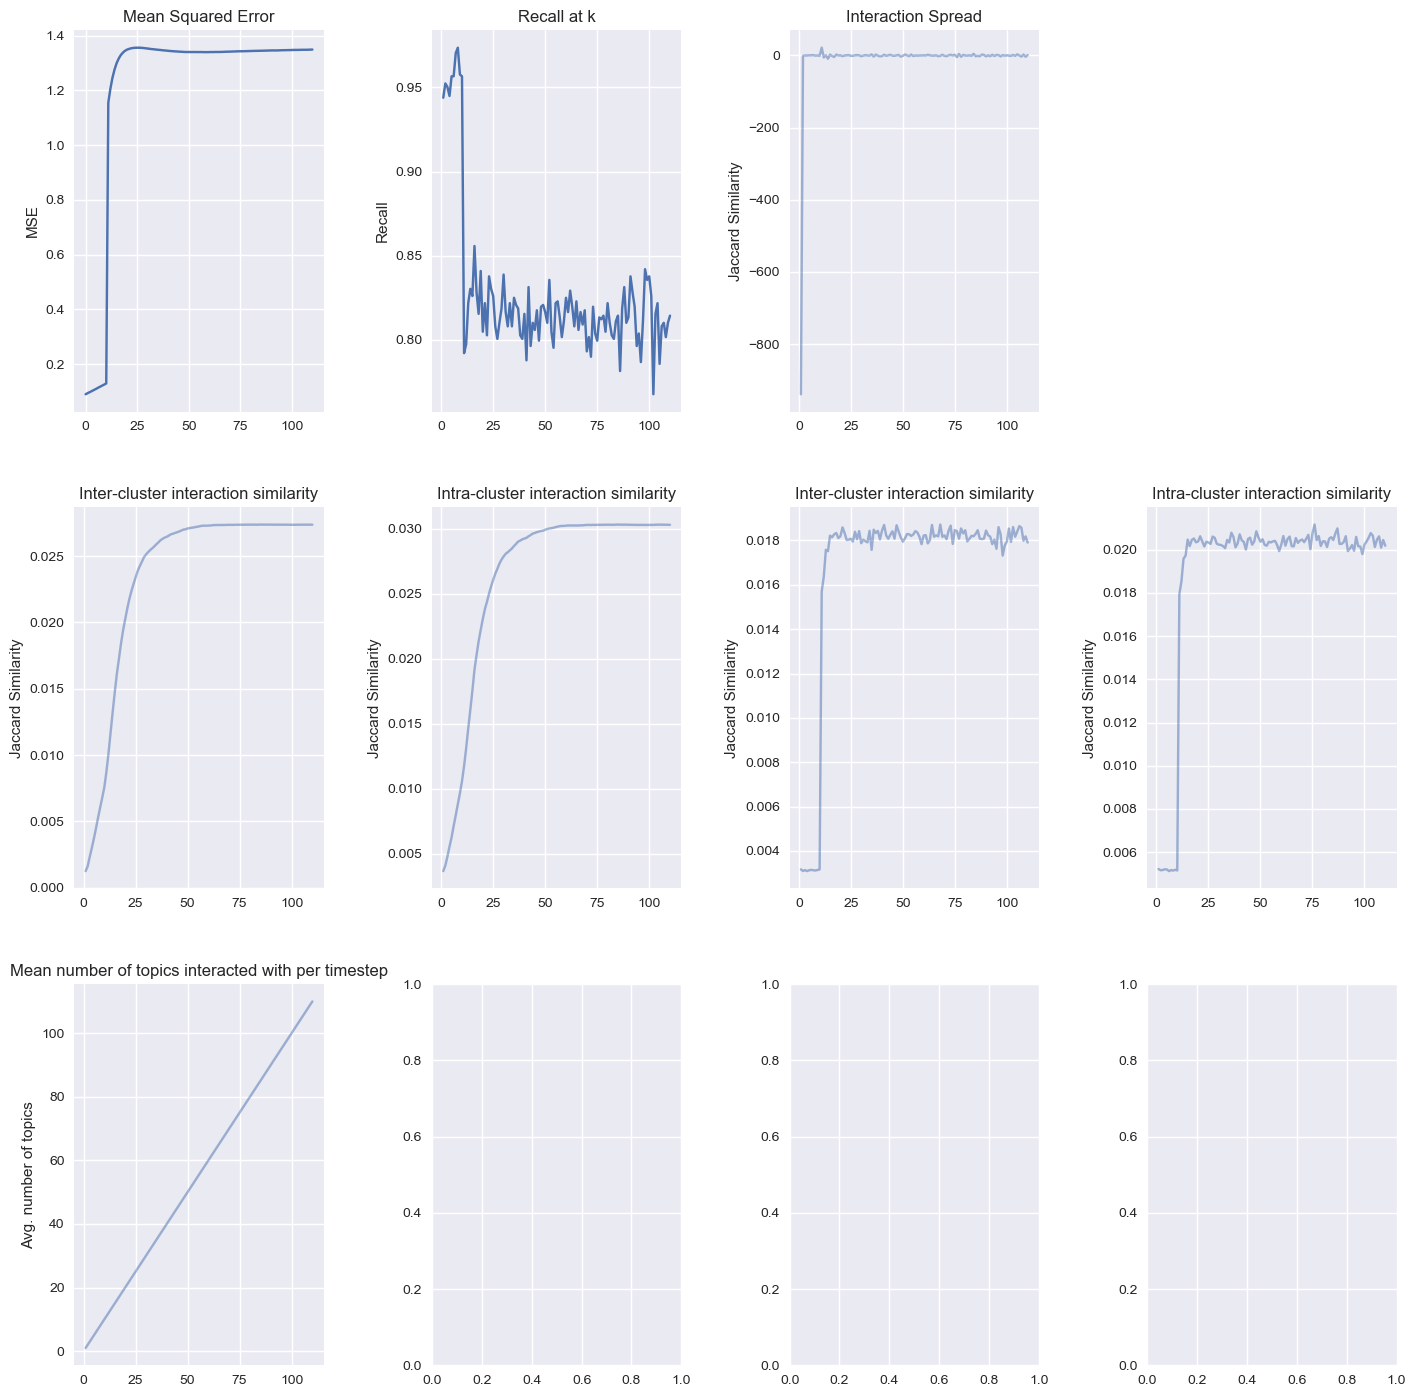

In [36]:
plot_measurements_1_df(measurements_df, model_name)

In [43]:
from numpy.random import RandomState
rs = RandomState(42)
k = 10

pred_scores = mo.inner_product(model.predicted_user_profiles, model.predicted_item_attributes)
top_k_idxs = mo.top_k_indices(matrix=pred_scores, k=k, random_state=rs)
print(top_k_idxs.shape)
print(top_k_idxs[0,:])
print(pred_scores[0,:10])

(943, 10)
[1201  100  818  938 1033  812 1253  539 1246 1637]
[1.31782349 0.84397485 1.77802267 1.77376666 0.84823086 1.31782349
 1.84109785 0.86004246 0.9137242  0.39044984]


In [ ]:
plot_histograms(measurements_df, 'interaction_histogram')

In [ ]:
# n_attrs=20
# max_iter=1000
# n_clusters=20

# binary_ratings_matrix = load_and_process_movielens(file_path='../data/ml-100k/u.data')

# # Get user and item representations using NMF
# # user_representation, item_representation = create_embeddings(binary_ratings_matrix, n_attrs=n_attrs, max_iter=max_iter)

# # Define topic clusters using NMF
# item_topics = get_topic_clusters(binary_ratings_matrix, n_attrs=n_attrs)

# # Create user clusters based off how often they interacted with the same item
# print('Calculating clusters...')
# co_occurence_matrix = binary_ratings_matrix @ binary_ratings_matrix.T
# print(co_occurence_matrix.shape)

# # Matrix factorize co_occurence_matrix to get embeddings
# nmf_cooc = NMF(n_components=n_attrs, max_iter=max_iter)
# W_topics = nmf_cooc.fit_transform(co_occurence_matrix)

# # cluster W_topics
# cluster_ids = KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=random_state).fit_predict(W_topics)

# print('Calculated clusters.')

In [ ]:
# score_fn = top_k_reranking
# probabilistic = False
# globals.ALPHA = 0.2
# alpha = globals.ALPHA

# # User parameters
# drift = 0.2
# attention_exp=1.5
# pair_all=False

In [ ]:
# num_users = user_representation.shape[0]
# num_items = item_representation.shape[1]
# print(f'Number of items: {num_items}')
# print(f'Number of users: {num_users}')

# if pair_all:
#     # All possible user pairs
#     user_pairs = [(u_idx, v_idx) for u_idx in range(len(user_representation)) for v_idx in range(len(user_representation))]

# else:
#     # create user_pairs by pairing users only with others that are not in the same cluster
#     user_pairs = []
#     for u_idx in range(num_users):
#         for v_idx in range(num_users):
#             if cluster_ids[u_idx] != cluster_ids[v_idx]:
#                 user_pairs.append((u_idx, v_idx))
# print(f'Number of user pairs: {len(user_pairs)}')
                
# users = Users(actual_user_profiles=user_representation, 
#               repeat_interactions=False, 
#               drift=drift,
#               attention_exp=attention_exp)

In [ ]:
# item_representation.shape[1]

In [ ]:
# mse = MSEMeasurement()
# measurements_list = [
#     InteractionMeasurement(), 
#     mse,  
#     InteractionSpread(), 
#     InteractionSimilarity(pairs=user_pairs), 
#     RecSimilarity(pairs=user_pairs), 
#     SerendipityMetric(), 
#     DiversityMetric(), 
#     NoveltyMetric(),
#     RecallMeasurement(),
#     # MeanNumberOfTopics(),
# ]

In [ ]:
# item_topics.shape

In [ ]:
# # Model
# config = {
#     'actual_user_representation': users,
#     'actual_item_representation': item_representation,
#     'item_topics': item_topics,
#     # 'num_attributes': n_attrs,
#     'num_items_per_iter': 10,
#     'seed': 42,
#     'record_base_state': True,
# }

# model_name='myopic'
# requires_alpha = False

# config['score_fn'] = top_k_reranking

# if probabilistic:
#     config['probabilistic_recommendations'] = True
#     model_name += '_prob'

In [ ]:
# model = BubbleBurster(**config)

# model.add_metrics(*measurements_list)

# print("Model representation of users and items are given by:")
# print(f"- An all-zeros matrix of users of dimension {model.predicted_user_profiles.shape}")
# print(f"- A randomly generated matrix of items of dimension {model.predicted_item_attributes.shape}")

In [ ]:
# train_timesteps=10
# model.startup_and_train(timesteps=train_timesteps)

In [ ]:
# run_timesteps=100
# model.run(timesteps=run_timesteps)

In [ ]:
# measurements = model.get_measurements()
# df_measurements = pd.DataFrame(measurements)
# df_measurements.head(5)

In [ ]:
# type(df_measurements['timesteps'].values[0])

In [ ]:
# def plot_measurements(df):
    
#     fig, ax = plt.subplots(3, 3, figsize=(15, 15))
#     fig.tight_layout(pad=5.0)

#     # plot rec_similarity with timesteps on x axis
#     legend_lines, legend_names = [], []
#     # for i, df in enumerate(dfs):
#     ts = df['timesteps']
#     # name = parameters_df.loc[i, 'model_name']
#     # if not np.isnan(parameters_df.loc[i, 'Lambda']):
#     #      name += f" (Lambda: {parameters_df.loc[i, 'Lambda']})" 
#     # legend_names.append(name)
#     ax[0,0].plot(ts, df['mse'], label='mse')
#     ax[0,1].plot(ts, df['rec_similarity'], label='rec_similarity')
#     ax[0,2].plot(ts, df['interaction_similarity'], label='interaction_similarity')
#     ax[1,0].plot(ts, df['serendipity_metric'], label='serendipity_metric')
#     ax[1,1].plot(ts, df['novelty_metric'], label='novelty_metric')
#     line, = ax[1,2].plot(ts, df['diversity_metric'], label='diversity_metric')
#     legend_lines.append(line)
    
#     for a in ax:
#         for b in a:
#             b.set_xlabel('Timestep')

#     ax[0, 0].set_title('Mean Squared Error')
#     ax[0, 0].set_ylabel('MSE')
    
#     ax[0, 1].set_title('Recommendation similarity')
#     ax[0, 1].set_ylabel('Similarity')
    
#     ax[0, 2].set_title('Interaction Similarity')
#     ax[0, 2].set_ylabel('Jaccard Similarity')
    
#     ax[1, 0].set_title('Serendipity')
#     ax[1, 0].set_ylabel('Serendipity')
    
#     ax[1, 1].set_title('Novelty')
#     ax[1, 1].set_ylabel('Novelty')

#     ax[1, 2].set_title('Diversity')
#     ax[1, 2].set_ylabel('Diversity')

#     ax[2, 0].set_title('Recall')
#     ax[2, 0].set_ylabel('Recall')

    
#     fig.legend(legend_lines, legend_names, loc='upper center', fontsize=14, frameon=False, ncol=5, bbox_to_anchor=(.5, 1.05))

In [ ]:
# plot_measurements(df_measurements)

In [ ]:
# predicted_user_profiles =  model.predicted_user_profiles
# predicted_item_attributes = model.predicted_item_attributes